# One hot encoder

Date: 25 August 2025<br>
By: Eunhye Yang<br>
Description:<br>
1. One hot encode categorical features
2. Min max scale ordinal features
3. Dichotomize outcomes (try 0-2, 3-5, 6 and 0-3, 4-5, 6)
4. Split train and testing dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
random.seed(42)

df = pd.read_csv('./normalized_nosurgery_QMH_2025Nov.csv')

In [2]:
df.columns

Index(['Age', 'Sex0female1male', 'Race0chinese1nonchinese', 'DM0no1yes',
       'HT0no1yes', 'Allstroke0no1yes', 'IschemicHeartdisease',
       'Atrialfibirllation', 'Antiplateletmedication',
       'Anticoagulant0no1warfarin2NOAC3Heparin', 'AdmissionGCS', 'Esubscore',
       'Vsubscore', 'Msubscore', 'ULpower', 'LLpower', 'AdmissionsystolicBP',
       'AdmissiondiastolicBP', 'CKDclass',
       'location1tha2ICGP3LN4caudate5lobar6brainstem7cerebellum8whitematter',
       'location0supra1infra', 'laterality0L1R3C', 'LARGESTICHVOLUME',
       'GRAEBSCORE', 'EverIVH', '@6MmRS', '6M mortality', 'ICH Score'],
      dtype='object')

In [3]:
categorical = [
    'Anticoagulant0no1warfarin2NOAC3Heparin',
    'location1tha2ICGP3LN4caudate5lobar6brainstem7cerebellum8whitematter',
    'laterality0L1R3C']
categorical_categories = [[0, 1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 8], [0, 1, 2]]
ordinal = ['AdmissionGCS', 'Esubscore', 'Vsubscore', 'Msubscore', 'ULpower', 'LLpower', 'CKDclass', 'GRAEBSCORE']

## Encoding categorical features

In [4]:
encoder = OneHotEncoder(categories=categorical_categories)

In [5]:
df_encoded = encoder.fit_transform(df[categorical]).toarray()

In [6]:
df_encoded.shape

(755, 15)

In [7]:
for i in range(len(categorical)):
    # Encode for no surgery
    temp = pd.DataFrame(df_encoded.T[:len(categorical_categories[i])].T, columns=[categorical[i]+str(j) for j in range(len(categorical_categories[i]))])
    df_encoded = df_encoded.T[len(categorical_categories[i]):]
    df_encoded = df_encoded.T
    df = df.drop(categorical[i], axis=1)
    df = pd.concat([df, temp], axis=1)

In [8]:
df.shape

(755, 40)

## Min max scale ordinal features

In [9]:
min_max = MinMaxScaler(feature_range=(0,1))

df[ordinal] = min_max.fit_transform(df[ordinal])

## Dichotomize outcomes

### 0-2, 3-5, 6

In [10]:
def dichotomize(row):
    if row['@6MmRS'] in [0, 1, 2]:
        return 0
    elif row['@6MmRS'] in [3, 4, 5]:
        return 1
    elif row['@6MmRS'] == 6: return 2
    else: return random.randint(0, 1)

df['outcomes'] = df.apply(dichotomize, axis=1)

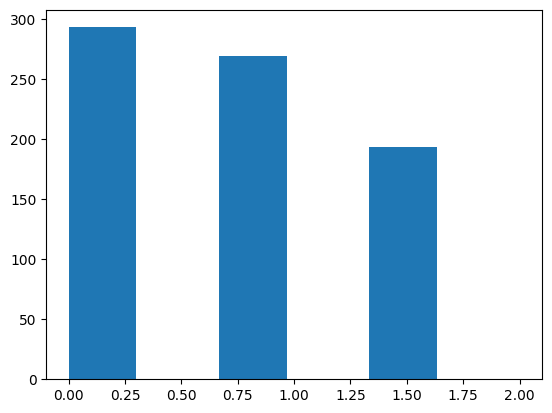

In [11]:
plt.hist(df['outcomes'], bins=3, width=0.3)
plt.show()

### 0-3, 4-5, 6

In [ ]:
def dichotomize(row):
    if row['@6MmRS'] in [0, 1, 2, 3]:
        return 0
    elif row['@6MmRS'] in [4, 5]:
        return 1
    elif row['@6MmRS'] == 6: return 2
    else: return random.randint(0, 1)

df['outcomes046'] = df.apply(dichotomize, axis=1)

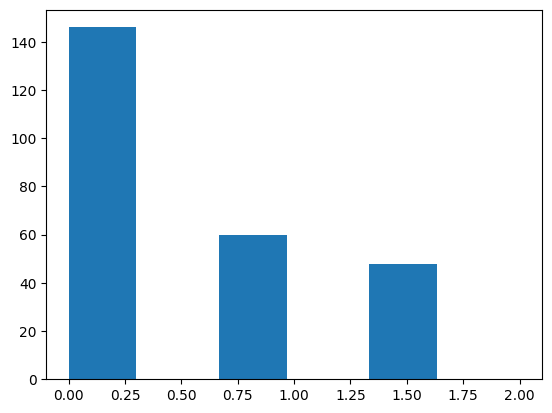

In [ ]:
plt.hist(df['outcomes046'], bins=3, width=0.3)
plt.show()

In [14]:
# for i in df.columns:
#     print(i)
#     print(df['IRB CODE'].loc[~df[i].isnull()].value_counts())
#     print()

## Save df

In [12]:
df.to_csv('final_preprocessed_nosurgery_QMH_2025Nov.csv', index=False)

## Train test split

In [13]:
df_train, df_test, y_train, y_test = train_test_split(df, df['outcomes'], test_size=0.25, stratify=df['outcomes'], random_state=42)

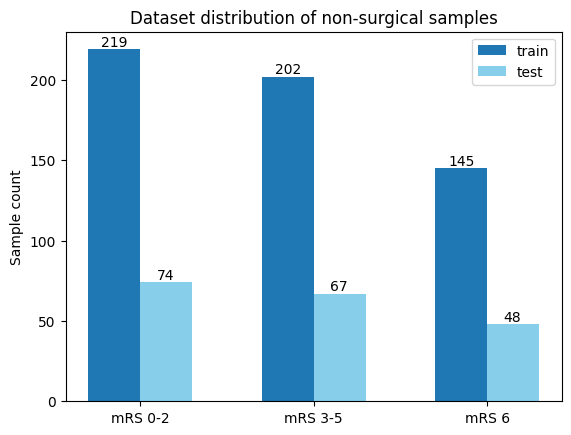

In [14]:
plt.bar(np.unique(df_train['outcomes'])-0.15, np.unique(df_train['outcomes'], return_counts=True)[1], label='train', width=0.3)
plt.bar(np.unique(df_test['outcomes'])+0.15, np.unique(df_test['outcomes'], return_counts=True)[1], label='test', width=0.3, color='skyblue')

for i in range(3):
    plt.text(i-0.225, np.unique(df_train['outcomes'], return_counts=True)[1][i]+2, str(np.unique(df_train['outcomes'], return_counts=True)[1][i]))
    plt.text(i+0.095, np.unique(df_test['outcomes'], return_counts=True)[1][i]+2, str(np.unique(df_test['outcomes'], return_counts=True)[1][i]))

plt.xticks([0, 1, 2], labels=['mRS 0-2', 'mRS 3-5', 'mRS 6'])
plt.title('Dataset distribution of non-surgical samples')
plt.ylabel('Sample count')
plt.legend()
plt.savefig('nosurgery_dist_036.png')
plt.show()

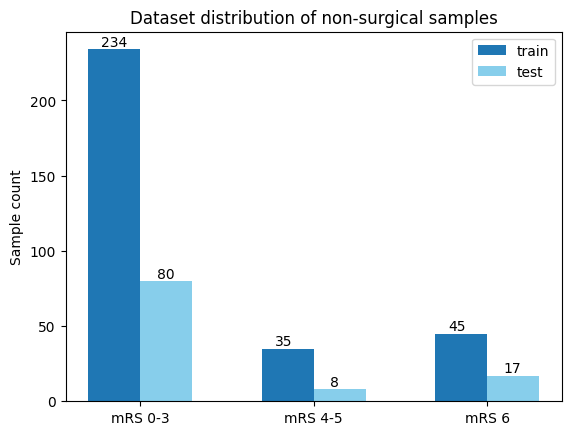

In [39]:
plt.bar(np.unique(df_train['outcomes046'])-0.15, np.unique(df_train['outcomes046'], return_counts=True)[1], label='train', width=0.3)
plt.bar(np.unique(df_test['outcomes046'])+0.15, np.unique(df_test['outcomes046'], return_counts=True)[1], label='test', width=0.3, color='skyblue')

for i in range(3):
    plt.text(i-0.225, np.unique(df_train['outcomes046'], return_counts=True)[1][i]+2, str(np.unique(df_train['outcomes046'], return_counts=True)[1][i]))
    plt.text(i+0.095, np.unique(df_test['outcomes046'], return_counts=True)[1][i]+2, str(np.unique(df_test['outcomes046'], return_counts=True)[1][i]))

plt.xticks([0, 1, 2], labels=['mRS 0-3', 'mRS 4-5', 'mRS 6'])
plt.title('Dataset distribution of non-surgical samples')
plt.ylabel('Sample count')
plt.legend()
plt.savefig('nosurgery_dist_046.png')
plt.show()

## Save df (train test split)

In [15]:
df_train.to_csv('final_preprocessed_nosurgery_QMH_train_2025Nov.csv', index=False)
df_test.to_csv('final_preprocessed_nosurgery_QMH_test_2025Nov.csv', index=False)